# Introduction

In this notebook, we will train a neural network using Tensorflow to classify animal images.
[Reference](https://www.tensorflow.org/tutorials/keras/classification)

We will be using the Animal data in this notebook
[dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals)

In [54]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
#handles various images operations
import os
#Instantly make your loops show a smart progress meter
from tqdm import tqdm
import random

# Load the labels

file = open("animals_.txt")
file_contents = file.read()
animals_dataset = file_contents.splitlines()

In [1]:
animals_dataset = ["bear","elephant","octopus","zebra"]

# Load the Data

In [2]:
IMG_SIZE = 60 # different shapes (landscape, potraite) are normalized
# method to load train a
def create_training_test_dataset(img_path):
    
    DATADIR = "animals/"
    training_data = []
    print(img_path)
    
    for category in animals_dataset:  # do dogs and cats

        path = os.path.join(DATADIR + img_path, category)  # create path to the animals
        class_num = animals_dataset.index(category)  # get the classification  (0 to 90).

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


    return training_data

In [3]:
training_dataset = create_training_test_dataset("training_set")

training_set


NameError: name 'os' is not defined

In [58]:
test_dataset = create_training_test_dataset("test_set")

test_set


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 214.72it/s]


In [59]:
print(len(training_dataset))

192


In [60]:
print(len(test_dataset))

48


# Visualising samples from training set

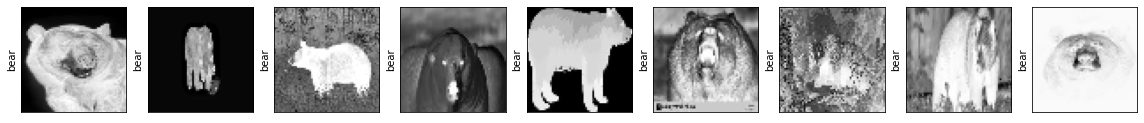

In [61]:
plt.figure(figsize=(20, 20))
for i in range(9):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    #plt.imshow(img_array, cmap='gray')
    image, label = training_dataset[i]
    plt.imshow(image, cmap=plt.cm.binary)
    plt.ylabel(animals_dataset[label])
plt.show()

# Shuffle the data. else the classifier will learn wrongly

In [62]:
random.shuffle(training_dataset)
random.shuffle(test_dataset)

We have got the classes nicely mixed in

In [63]:
X = []
y = []

for features,label in training_dataset:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_TRAIN_DATA = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_data = np.array(y)

In [64]:
X = []
y = []

for features,label in test_dataset:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_TEST = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test_label = np.array(y)

In [65]:
for sample in training_dataset[:20]:
    print(sample[1])

0
3
3
3
2
2
3
1
1
0
2
1
1
0
2
0
3
3
3
1


In [66]:
import pickle

pickle_out = open("X_TRAIN.pickle","wb")
pickle.dump(X_TRAIN_DATA, pickle_out)
pickle_out.close()

pickle_out = open("y_train_label.pickle","wb")
pickle.dump(y_test_data, pickle_out)
pickle_out.close()

In [67]:
import pickle

pickle_out = open("X_TEST.pickle","wb")
pickle.dump(X_TEST, pickle_out)
pickle_out.close()

pickle_out = open("y_test_label.pickle","wb")
pickle.dump(y_test_label, pickle_out)
pickle_out.close()

# We can always load it in to our current script, or a totally new one by doing

In [68]:
import pickle

pickle_in = open("X_TRAIN.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_train_label.pickle","rb")
y = pickle.load(pickle_in)

# Building the model

In [69]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "Animals-vs-Animals-CNN"

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))  # this for saving to use later for viewing tensor callback

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 58, 58, 256)       2560      
                                                                 
 activation_3 (Activation)   (None, 58, 58, 256)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 256)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 256)       590080    
                                                                 
 activation_4 (Activation)   (None, 27, 27, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                  

* **Flatten layer** converts the 2D array to a 1D array (28 x 28 = 784 dimensions)
* **Dense layer** deeply connects with its preceding layer, i.e. all neurons of the layer are connected to every neuron of its preceding layer. Neurons in the deep layer receiv output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication.
* One Dense layer with **128 nodes**
* One Dense layer with **10 nodes** which returns an array of length 10. Each node contains a score indicating the current images' probability of belong to each of the classes 

In [71]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[tensorboard])

Epoch 1/10
5/5 [==============================] - 2s 396ms/step - loss: -47.1434 - accuracy: 0.2549 - val_loss: -109.8802 - val_accuracy: 0.2821
Epoch 2/10
5/5 [==============================] - 2s 351ms/step - loss: -598.1739 - accuracy: 0.2418 - val_loss: -750.7463 - val_accuracy: 0.2821
Epoch 3/10
5/5 [==============================] - 2s 362ms/step - loss: -2634.5220 - accuracy: 0.2418 - val_loss: -2722.5757 - val_accuracy: 0.2821
Epoch 4/10
5/5 [==============================] - 2s 354ms/step - loss: -8453.1348 - accuracy: 0.2418 - val_loss: -7105.4565 - val_accuracy: 0.2821
Epoch 5/10
5/5 [==============================] - 2s 357ms/step - loss: -20877.4121 - accuracy: 0.2418 - val_loss: -16159.3643 - val_accuracy: 0.2821
Epoch 6/10
5/5 [==============================] - 2s 355ms/step - loss: -44813.5312 - accuracy: 0.2418 - val_loss: -33262.4688 - val_accuracy: 0.2821
Epoch 7/10
5/5 [==============================] - 2s 355ms/step - loss: -86401.9375 - accuracy: 0.2418 - val_loss

## Evaluate

In [74]:
import pickle

pickle_in = open("X_TEST.pickle","rb")
test_images_init = pickle.load(pickle_in)
test_images = test_images_init/255.0

pickle_in = open("y_test_label.pickle","rb")
test_labels = pickle.load(pickle_in)


In [75]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Validation Loss: {}, Validation Accuracy: {}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 58ms/step - loss: -477543.4062 - accuracy: 0.2500
Validation Loss: -477543.40625, Validation Accuracy: 0.25


## Visualisation

def plot_image(i, predictions_array, true_label, img):
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#7d4646")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

The Flatten layer expects the input for its layer in the form of (batch, .... channel_last) or (batch, channel_first, ....), so we need to transform each image so that we have the batch size mentioned with the input as well. Our input shapefor each image will then become (1, 28, 28)

i = 120

# Prediction
image = tf.convert_to_tensor(test_images[i])
image_batch = tf.expand_dims(image, [0])
prediction = probability_model.predict(image_batch)
print(class_names[np.argmax(prediction)])

# Plotting
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[0], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, prediction[0],  test_labels[i])
plt.show()